In [ ]:
# Importing the necessary library
import pandas as pd

# Load your dataset (Replace 'your_dataset.csv' with the actual file path)
# For example, if it's uploaded in Colab, use the file picker in Colab or provide the path
df = pd.read_csv('Dirty.csv')

# Display first few rows to verify the data loaded correctly (optional)
df.head()

# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Checking for null values in each column
null_counts = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)


Number of duplicate rows: 286

Number of null values in each column:
age                    4
sex                    2
chest pain type        3
resting bp s           2
cholesterol            6
fasting blood sugar    3
resting ecg            2
max heart rate         0
exercise angina        3
oldpeak                2
ST slope               5
target                 7
dtype: int64


In [ ]:
# Importing the necessary library
import pandas as pd

# Load your dataset (Replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('Dirty.csv')

# Define columns for different null-handling methods
drop_columns = ['age', 'sex', 'exercise angina', 'oldpeak', 'ST slope', 'chest pain type',
                'target', 'fasting blood sugar', 'resting ecg']

# Drop rows with null values in specific columns
df = df.dropna(subset=drop_columns)

# Fill remaining null values with the mean of each column (only for numeric columns)
df = df.fillna(df.mean(numeric_only=True))

# Display the result to verify
print("Dataset after handling null values:")
print(df.isnull().sum())


Dataset after handling null values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [ ]:
# Importing the necessary library
import pandas as pd

# Load your dataset (Replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('Dirty.csv')

# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print("Duplicates removed and cleaned data saved as 'cleaned_dataset.csv'.")


Duplicates removed and cleaned data saved as 'cleaned_dataset.csv'.


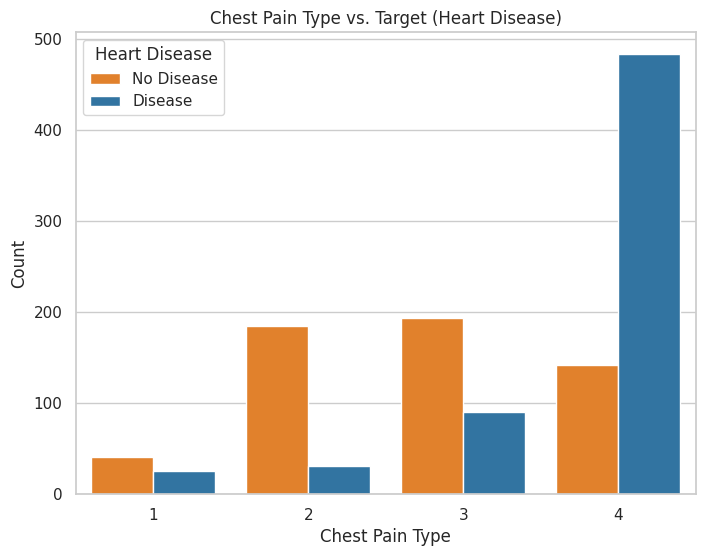

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'heart_statlog_cleveland_hungary_fin.csv' with the actual file name or path
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Preview the dataset to check column names and data structure
df.head()

# Set plot style for better readability
sns.set(style="whitegrid")


# Option 4: Using custom color palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='chest pain type', hue='target', palette=['#FF7F0E', '#1F77B4'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type vs. Target (Heart Disease)")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()


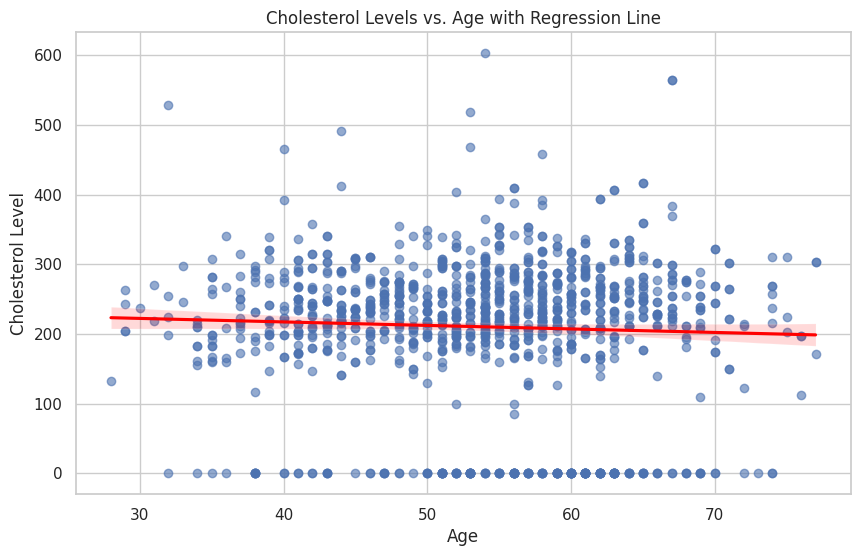

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file name or path
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Preview the dataset to check column names and data structure
df.head()

# Set plot style for better readability
sns.set(style="whitegrid")

# Plotting Cholesterol Levels vs. Age with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='cholesterol', scatter_kws={'alpha':0.6}, line_kws={"color":"red"})

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Levels vs. Age with Regression Line")

# Show plot
plt.show()


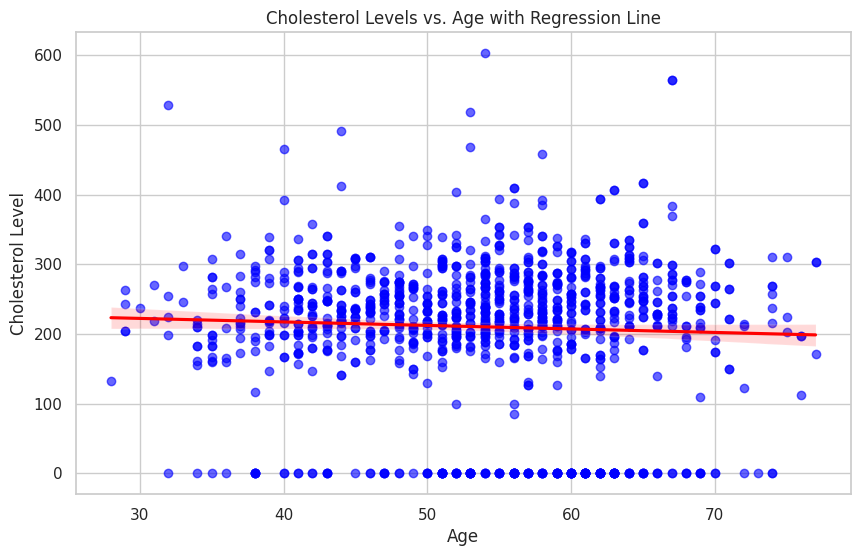

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file name or path
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Preview the dataset to check column names and data structure
df.head()

# Set plot style for better readability
sns.set(style="whitegrid")

# Plotting Cholesterol Levels vs. Age with Regression Line
plt.figure(figsize=(10, 6))

# Choose a categorical variable to use for hue (e.g., 'target' for heart disease presence)
sns.regplot(
    data=df,
    x='age',
    y='cholesterol',
    scatter_kws={'alpha': 0.6, 'color': 'blue'},  # Update dot color here
    line_kws={"color": "red"}
)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Levels vs. Age with Regression Line")

# Show plot
plt.show()


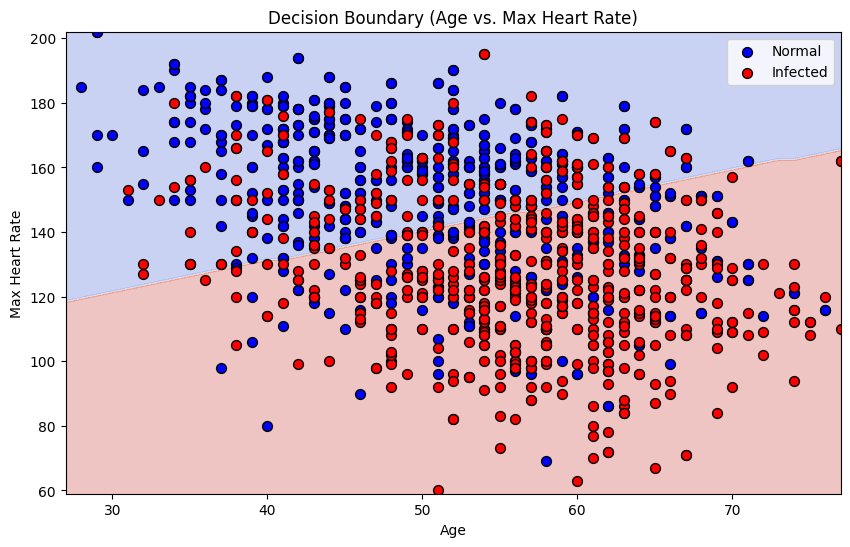

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Select features and target without scaling
X = df[['age', 'max heart rate']].values
y = df['target'].values

# Train the model directly on the original data
model = LogisticRegression()
model.fit(X, y)

# Generate a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Predict on the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Map target values to colors and labels
colors = ['blue' if target == 0 else 'red' for target in y]
labels = ['Normal' if target == 0 else 'Infected' for target in y]

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot with specific colors and labels
for color, label in zip(['blue', 'red'], ['Normal', 'Infected']):
    plt.scatter(X[y == (1 if label == 'Infected' else 0), 0],
                X[y == (1 if label == 'Infected' else 0), 1],
                c=color, label=label, edgecolor='k', s=50)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Decision Boundary (Age vs. Max Heart Rate)")
plt.legend(loc='upper right')
plt.show()


<ipython-input-8-ceb1ff373e61>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_heart_disease = df.groupby('age_group')['target'].mean() * 100


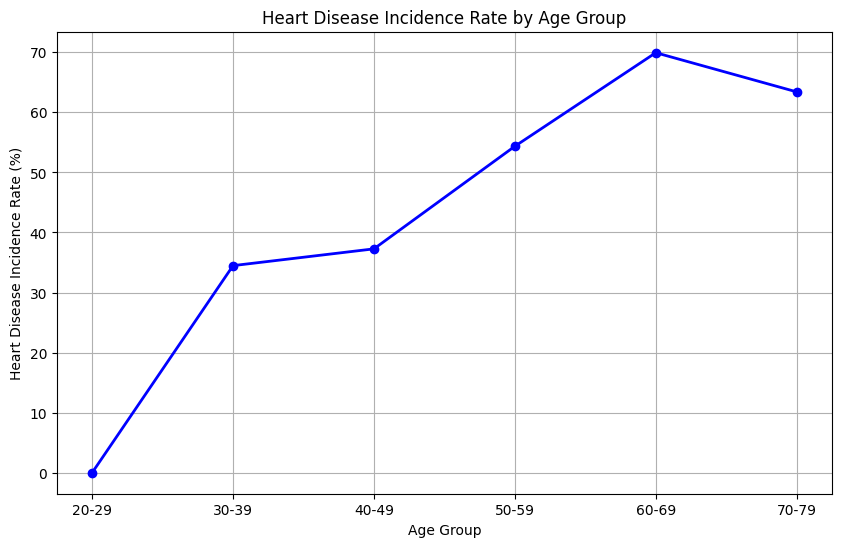

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Define age bins for grouping and labels for each age range
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create an age group column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate incidence rate of heart disease for each age group
age_group_heart_disease = df.groupby('age_group')['target'].mean() * 100

# Plotting the incidence rate by age group
plt.figure(figsize=(10, 6))
age_group_heart_disease.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Incidence Rate (%)")
plt.title("Heart Disease Incidence Rate by Age Group")
plt.grid(True)
plt.show()


<ipython-input-1-c8c421826e6d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df.groupby(['age_group', 'target'])[['cholesterol', 'max heart rate']].mean().reset_index()


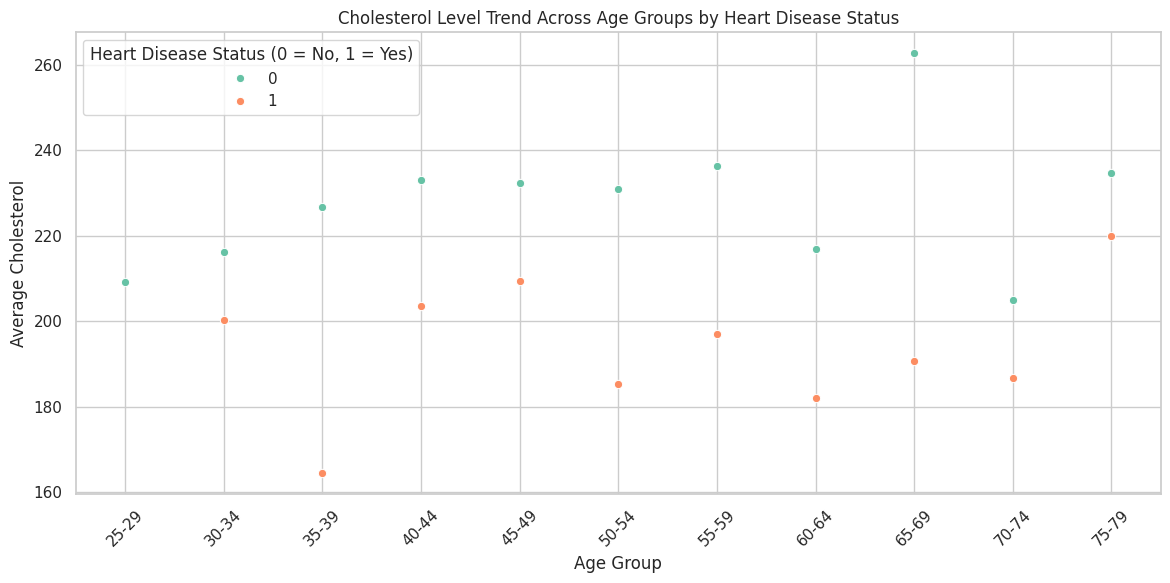

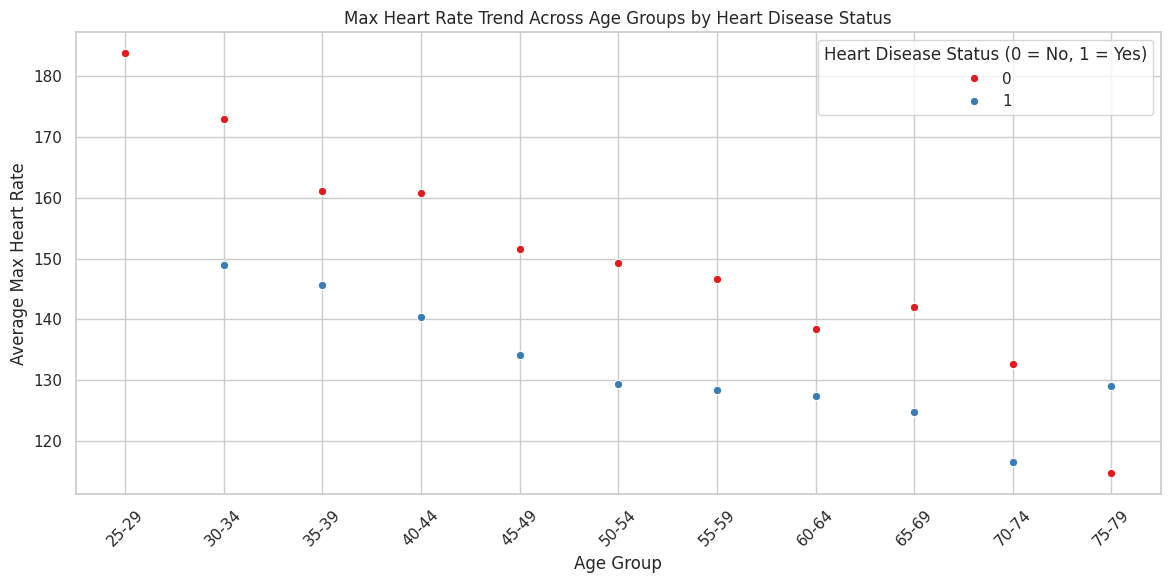

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Define age bins and labels (e.g., every 5 years)
age_bins = list(range(20, 90, 5))
age_labels = [f"{age}-{age+4}" for age in age_bins[:-1]]

# Group by age bins and target to calculate mean cholesterol and max heart rate
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_data = df.groupby(['age_group', 'target'])[['cholesterol', 'max heart rate']].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Plot cholesterol trend across age groups (dots only)
plt.figure(figsize=(14, 6))
sns.lineplot(data=age_group_data, x='age_group', y='cholesterol', hue='target',
             marker='o', palette="Set2", linestyle='')  # Remove lines by setting linestyle=''
plt.xticks(rotation=45)
plt.title("Cholesterol Level Trend Across Age Groups by Heart Disease Status")
plt.xlabel("Age Group")
plt.ylabel("Average Cholesterol")
plt.legend(title="Heart Disease Status (0 = No, 1 = Yes)")
plt.show()

# Plot max heart rate trend across age groups (dots only)
plt.figure(figsize=(14, 6))
sns.lineplot(data=age_group_data, x='age_group', y='max heart rate', hue='target',
             marker='o', palette="Set1", linestyle='')  # Remove lines by setting linestyle=''
plt.xticks(rotation=45)
plt.title("Max Heart Rate Trend Across Age Groups by Heart Disease Status")
plt.xlabel("Age Group")
plt.ylabel("Average Max Heart Rate")
plt.legend(title="Heart Disease Status (0 = No, 1 = Yes)")
plt.show()


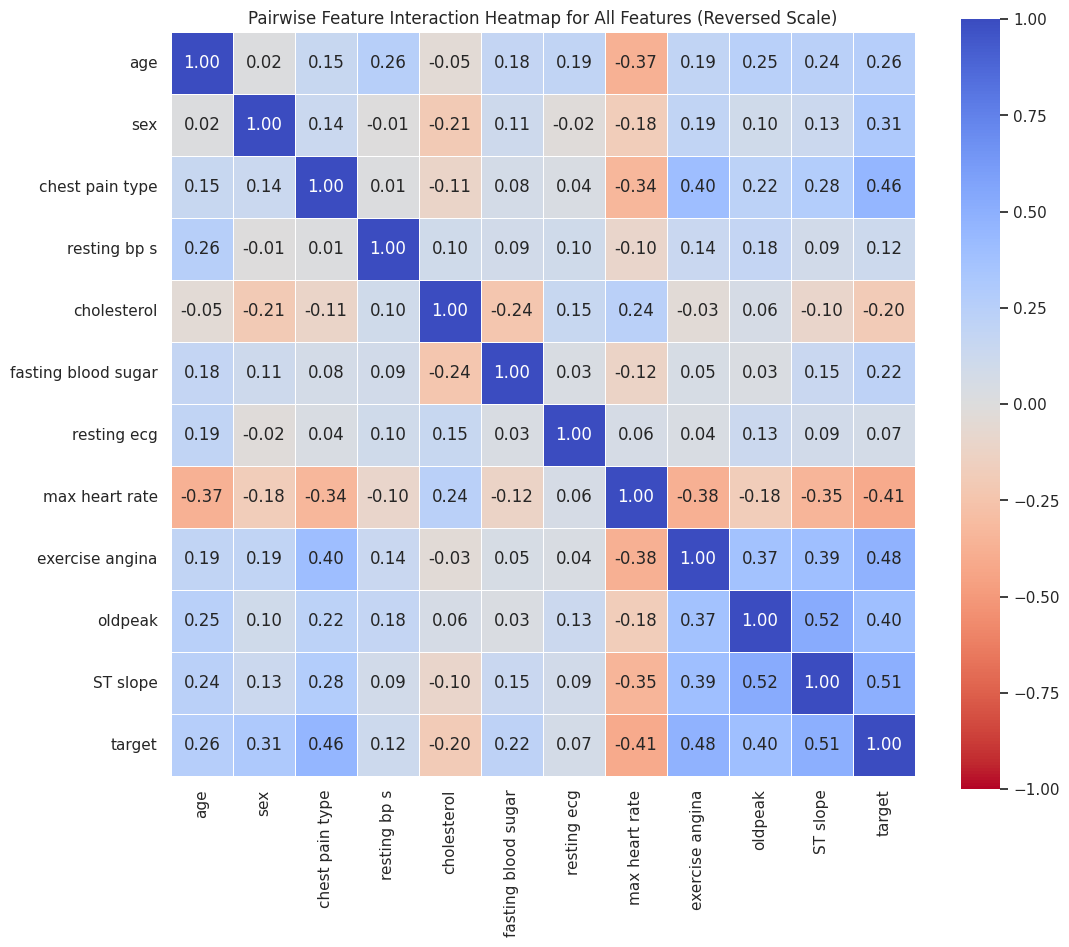

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with reversed color scale
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, square=True, fmt=".2f", linewidths=0.5)

# Set title
plt.title("Pairwise Feature Interaction Heatmap for All Features (Reversed Scale)")

# Show the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_fin.csv')

# Calculate the mean of the cholesterol column, excluding zero values
mean_cholesterol = df[df['cholesterol'] != 0]['cholesterol'].mean()

# Replace 0 values in the cholesterol column with the mean
df['cholesterol'] = df['cholesterol'].replace(0, mean_cholesterol)

# Save the modified dataset to a new CSV file
output_path = 'modified_heart_dataset.csv'
df.to_csv(output_path, index=False)

# Print the path to the new CSV file
print(f"New CSV file created: {output_path}")


New CSV file created: modified_heart_dataset.csv


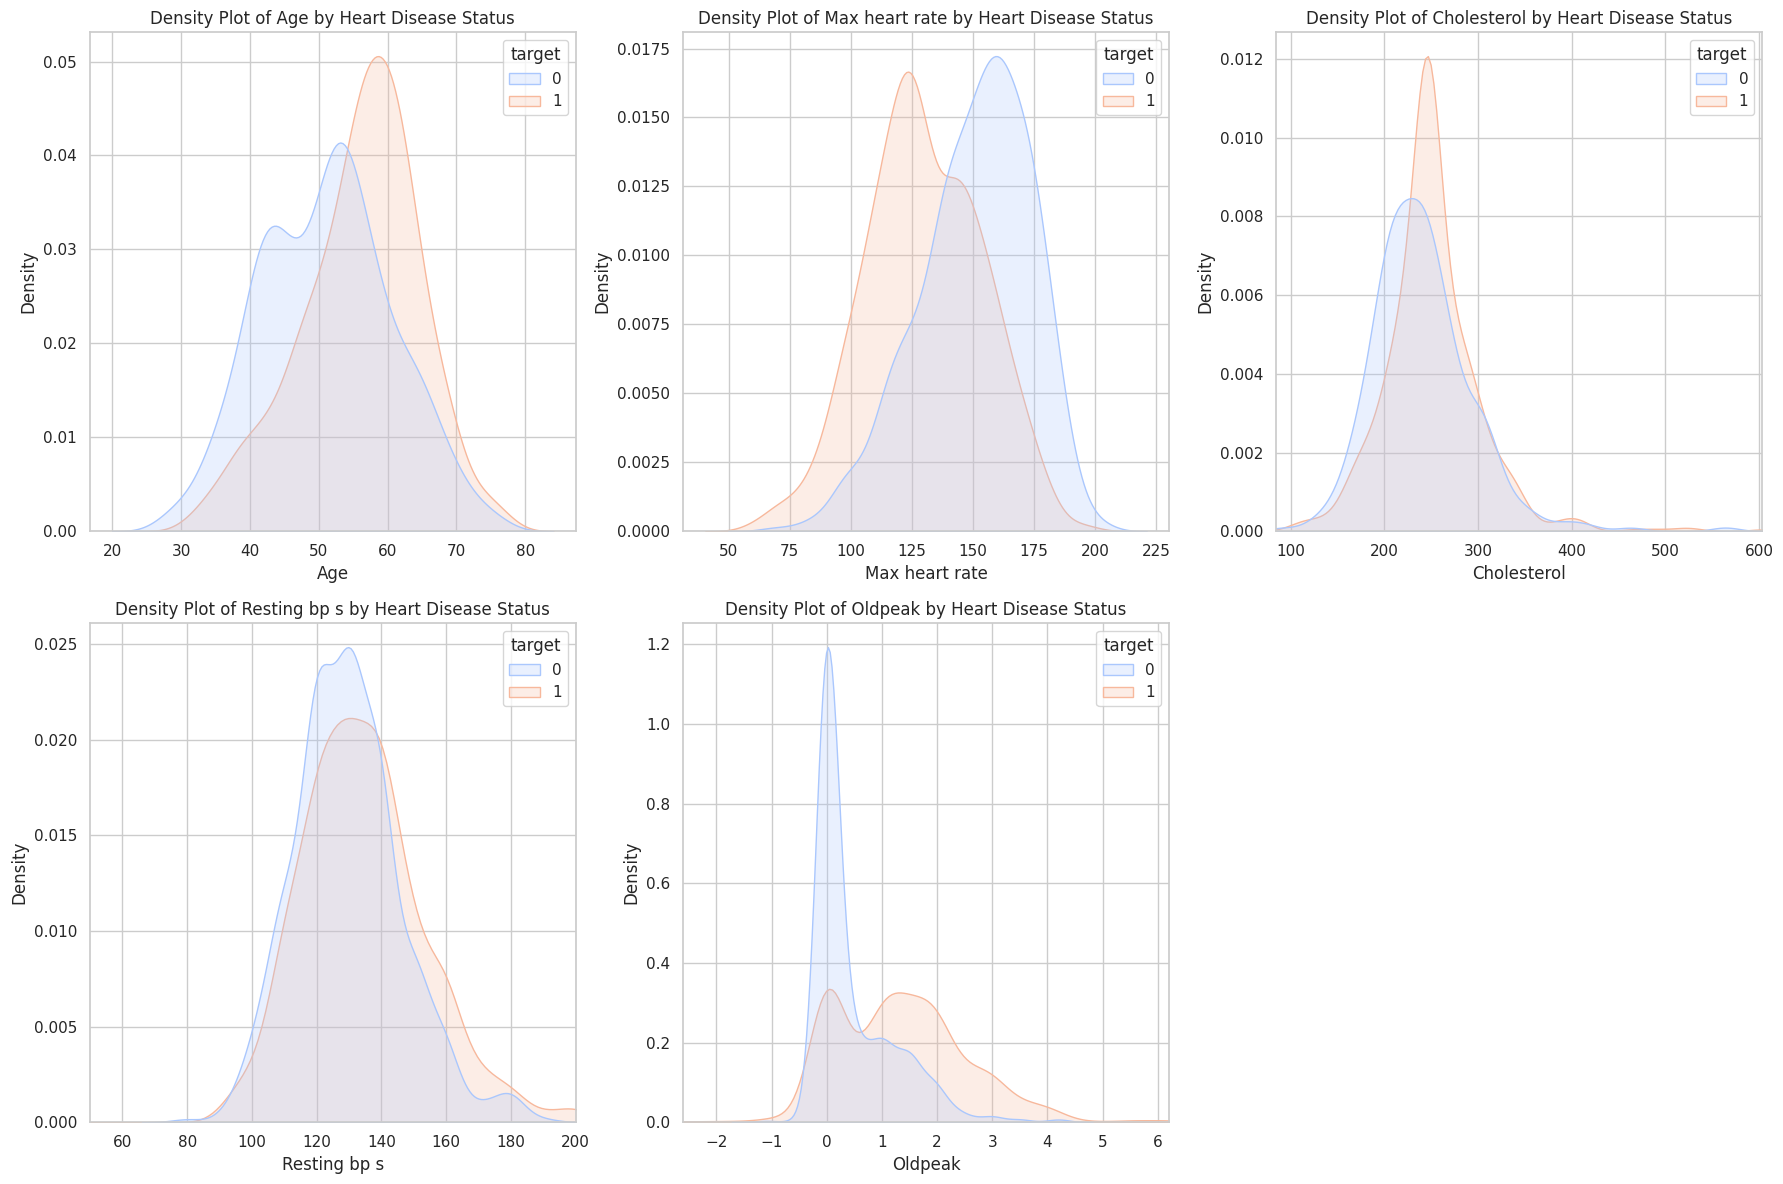

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('modified_heart_dataset.csv')

# Set up the plotting style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# List of features to plot
features = ['age', 'max heart rate', 'cholesterol', 'resting bp s', 'oldpeak']

# Define x-axis limits for cholesterol and oldpeak based on their data range
x_limits = {
    'cholesterol': (df['cholesterol'].min(), df['cholesterol'].max()),
    'oldpeak': (df['oldpeak'].min(), df['oldpeak'].max())
}

# Plot KDE for each feature, grouped by target (heart disease presence)
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Adjust layout for readability (2 rows, 3 columns)
    sns.kdeplot(data=df, x=feature, hue='target', fill=True, common_norm=False, palette="coolwarm")
    plt.title(f"Density Plot of {feature.capitalize()} by Heart Disease Status")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Density")

    # Apply x-axis limits for cholesterol, oldpeak, and resting bp s
    if feature in x_limits:
        plt.xlim(x_limits[feature])
    if feature == 'resting bp s':
        plt.xlim(50, df['resting bp s'].max())  # Set x-axis to start at 50 for resting bp s

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-14-9e6461a93c86>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y=feature, palette="Set2", split=True)
<ipython-input-14-9e6461a93c86>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y=feature, palette="Set2", split=True)
<ipython-input-14-9e6461a93c86>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y=feature, palette="Set2", split=True)


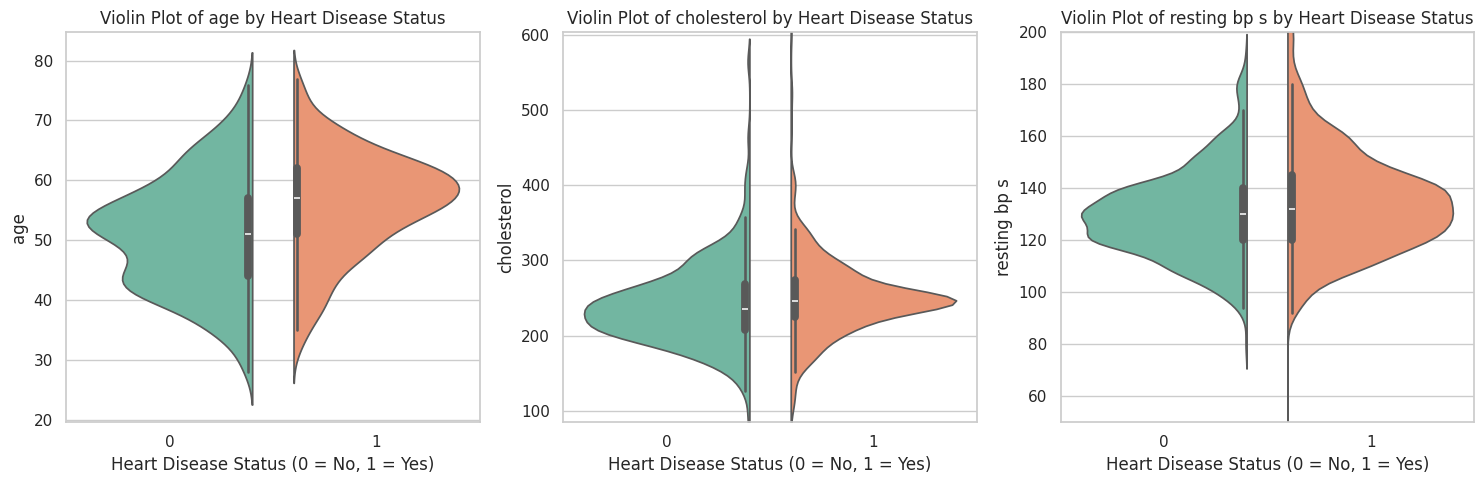

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('modified_heart_dataset.csv')

# Set the plot style
sns.set(style="whitegrid")

# List of features to plot
features = ['age', 'cholesterol', 'resting bp s']

# Define custom y-axis limits for cholesterol and resting bp s
y_limits = {
    'cholesterol': (df['cholesterol'].min(), df['cholesterol'].max()),
    'resting bp s': (50, df['resting bp s'].max())  # Set resting bp s to start from 50
}

# Create a figure with multiple subplots
plt.figure(figsize=(15, 5))

# Generate a violin plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.violinplot(data=df, x='target', y=feature, palette="Set2", split=True)
    plt.title(f"Violin Plot of {feature} by Heart Disease Status")
    plt.xlabel("Heart Disease Status (0 = No, 1 = Yes)")
    plt.ylabel(feature)

    # Apply custom y-axis limits for cholesterol and resting bp s
    if feature in y_limits:
        plt.ylim(y_limits[feature])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<ipython-input-15-b95e65c678ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='cholesterol', palette="Set2")


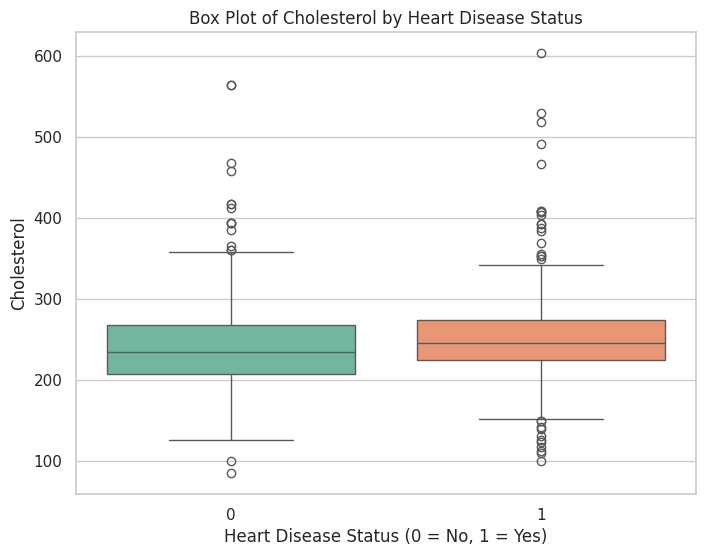

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('modified_heart_dataset.csv')

# Set the plot style
sns.set(style="whitegrid")

# Create a box plot for cholesterol by heart disease status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='cholesterol', palette="Set2")
plt.title("Box Plot of Cholesterol by Heart Disease Status")
plt.xlabel("Heart Disease Status (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")

# Display the plot
plt.show()
